Nama    : Benedick Asdyo

NIM        : 2101631090



## 1.These are four-point processing transformations:
• Thresholding

• Gray-scaling

• Negative transformation

• Histogram Equalization


## a. Please explain the basic concepts of above point processing transformations. Complete your explanations with the mathematical equations of the transformations.. 

**Answer :**


*   Thresholding


> Merupakan konversi gambar ke binary dengan segmentasi. Region gambar yang cenderung gelap akan dibuat semakin gelap (hitam sempurna dengan nilai intensitas sebesar 0), sedangkan region gambar yang cenderung terang akan dibuat semakin terang (putih sempurna dengan nilai intensitas sebesar 1). Oleh karena itu, keluaran dari proses transformasi dengan metode thresholding adalah berupa gambar dengan piksel biner dengan nilai intensitas piksel sebesar 0 atau 1.



> secara matematis dapat dituliskan jika g(x,y) merupakan hasil thresholding dari f(x,y) maka :
>g(x,y) = 1 jika f(x,y) >= 1

> g(x,y) = 0 else where

*   Gray-scaling


> Proses untuk  mengubah  gambar  yang  memiliki warna menjadi  gambar  yang  memiliki  tingkat  warna abu-abu    (gray-level).    Proses grayscaling langsung   membagi   sama   rata   ketiga   nilai RGB warna  pada suatu gambar.  Ada banyak ekuasi matematika untuk melakukan grayscalling , salah satunya yang paling sederhana adalah dengan rata-rata dari nilai piksel RGB yang paling dominan atau dalam rumus bisa ditulis (max(R, G, B) + min(R, G, B)) / 2 (sumber : https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/)
* Negative transformation

> Secara sederhana, negative transformation ini mengubah daerah gambar yang paling terang menjadi paling gelap dan sebaliknya. Jenis transformasi negatif ini banyak digunakan dalam bidang medis. Rumus dari transformasi ini adalah s = L-1-r dimana s adalah intensitas output dan r intensitas input.
* Histogram Equalization


> Histogram equalization adalah sebuah proses yang mengubah distribusi nilai derajat keabuan pada sebuah citra sehingga menjadi seragam (uniform). Tujuan dari histogram equalization adalah untuk memperoleh penyebaran histogram yang merata sehingga setiap derajat keabuan memiliki jumlah piksel yang relatif sama. Perataan histogram diperoleh dengan cara mengubah derajat keabuan sebuah piksel (r) dengan derajat keabuan yang baru (s) dengan sebuah fungsi transformasi T. Sama seperti cara lain ada banyak rumus matematis untuk melakukan metode ini salah satunya adalah histogram equalization pada citra dengan skala keabuan k bit adalah seperti pada persamaan berikut: image.pngdimana

> Ci        = distribusi kumulatif dari nilai skala keabuan ke –i dari citra asli

> round = fungsi pembulatan ke bilangan yang terdekat

> Ko       = nilai keabuan hasil histogram equalization

> w         = lebar citra

> h          = tinggi citra


##b. Furthermore, please download the image from this URL: https://qrgo.page.link/YNzeX The first step is you load the image (lena_color.gif) and implement all above point processing transformations. It can be done by using OpenCV library.


**Answer :**

gambar yang akan digunakan :

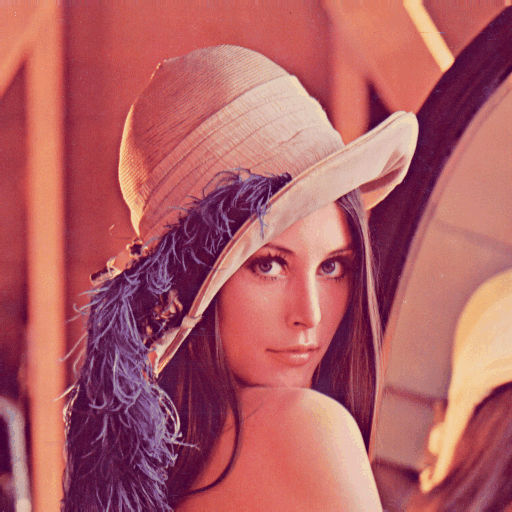

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

image = io.imread("https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_color.gif") 
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image)

Thresholding

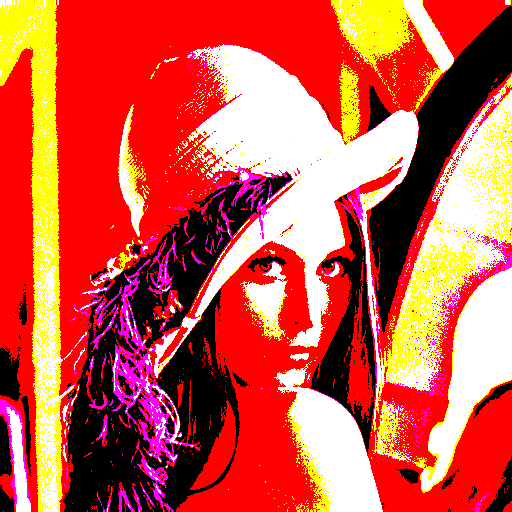

In [ ]:
img = image
ret, thres = cv.threshold(img, 120, 255, cv.THRESH_BINARY)
cv2_imshow(thres)

Gray-scaling


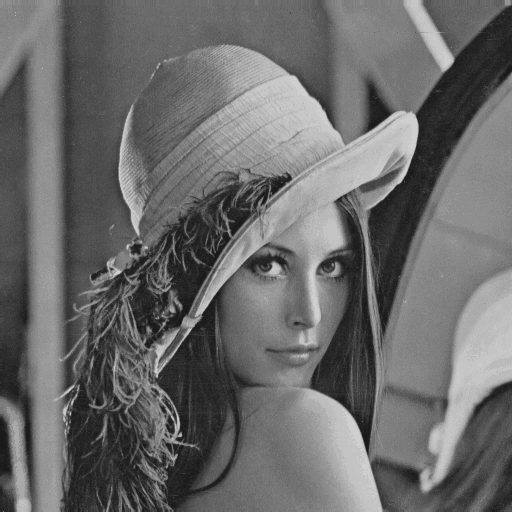

In [ ]:
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
cv2_imshow(gray)

Negative transformation

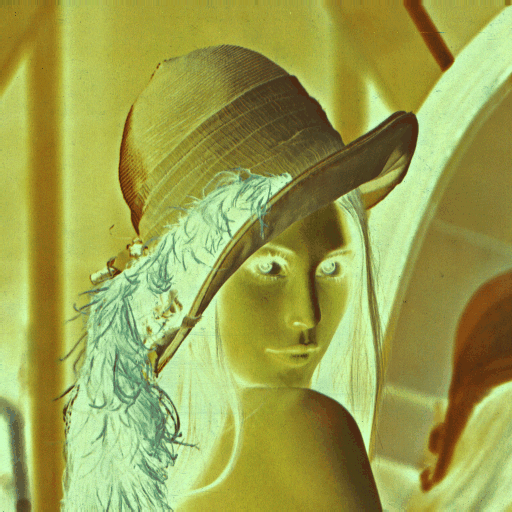

In [ ]:
img_bgr = cv.cvtColor(image, cv.COLOR_RGB2BGR)
img_neg = 1 - img_bgr 
cv2_imshow(img_neg)

Histogram Equalization

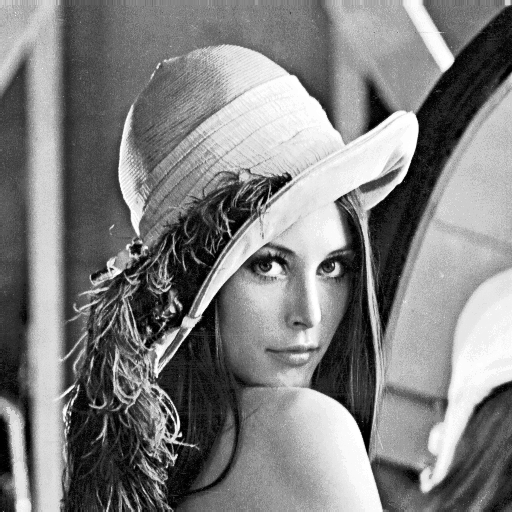

In [ ]:
equ = cv.equalizeHist(gray)
cv2_imshow(equ)

## 2. Please download the image from this URL: https://qrgo.page.link/Vt7Ag The first step is you load the image (opera_house.jpg) and convert it into grayscale. It can be done by using Pillow library.

##Preperation

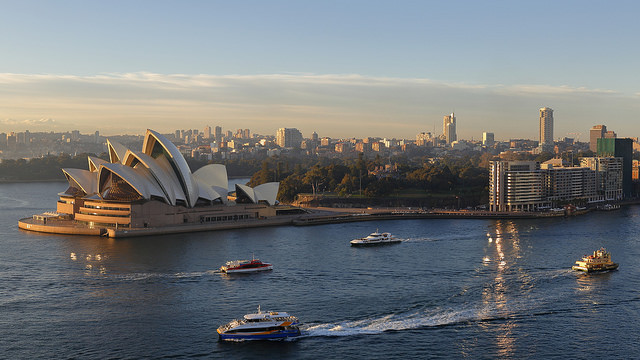

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

image = io.imread("https://qrgo.page.link/Vt7Ag") 
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image)

grayscale

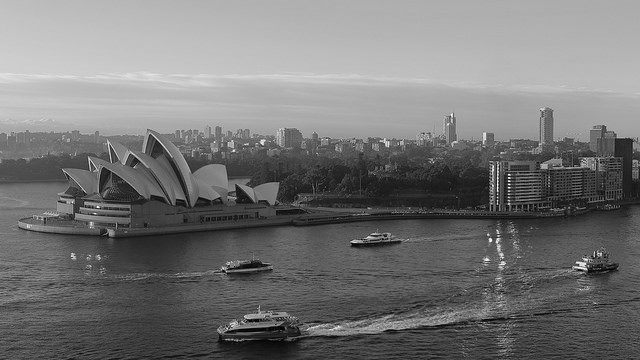

In [ ]:
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
cv2_imshow(gray)

## Please find the solution for: Convolution operation without border padding
## a. Implement the above calculations using Numpy library.

In [ ]:
kernel1 = [
        [1.0/9.0, 1.0/9.0, 1.0/9.0],
        [1.0/9.0, 1.0/9.0, 1.0/9.0],
        [1.0/9.0, 1.0/9.0, 1.0/9.0]
    ]
kernel2 = [
        [1,0,-1],
        [1,0,-1],
        [1,0,-1]
    ]
kernel1 = np.array(kernel1)
kernel2 = np.array(kernel2)


In [ ]:
## by default padding is 0
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else: 
        imagePadded = image
    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


In [ ]:
## karena disoal diminta tanpa padding
convolve2D(gray,kernel1)

array([[190.        , 190.        , 190.        , ..., 175.        ,
        175.        , 175.        ],
       [190.33333333, 190.22222222, 190.11111111, ..., 175.        ,
        175.        , 175.        ],
       [190.66666667, 190.55555556, 190.44444444, ..., 175.        ,
        175.        , 175.        ],
       ...,
       [ 82.88888889,  82.44444444,  83.22222222, ...,  67.55555556,
         66.44444444,  65.77777778],
       [ 84.11111111,  82.88888889,  83.66666667, ...,  55.77777778,
         56.88888889,  59.11111111],
       [ 69.44444444,  67.55555556,  69.33333333, ...,  52.11111111,
         53.44444444,  54.55555556]])

In [ ]:
## karena disoal diminta tanpa padding
convolve2D(gray,kernel2)

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  -1.,  -1., ...,   0.,   0.,   0.],
       [  0.,  -1.,  -1., ...,   0.,   0.,   0.],
       ...,
       [ -6.,   9.,   0., ...,  -9.,  -6.,  -1.],
       [-11.,  10.,  -3., ...,   2.,  14.,  14.],
       [-27.,   3.,  23., ...,   9.,  11.,   2.]])

## b. Convert above numpy array to images and show the results. The implementation can use Pillow library.

In [ ]:
filteredK1 = cv.filter2D(gray, -1, kernel1)
filteredK2 = cv.filter2D(gray, -1, kernel2)

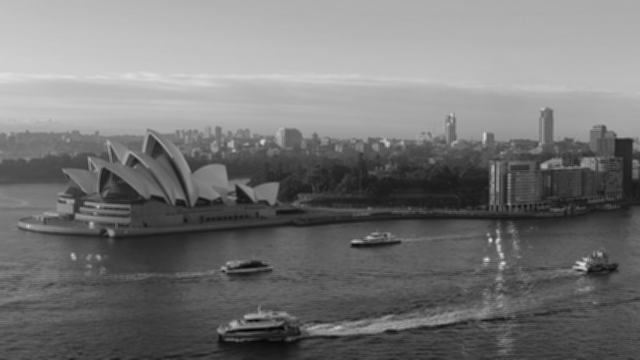

In [ ]:
cv2_imshow(filteredK1)

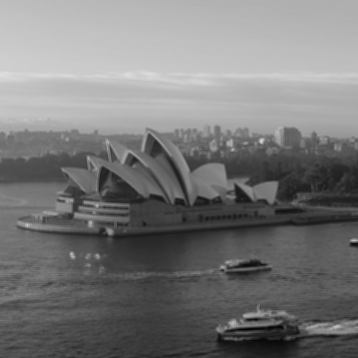

In [ ]:
cv2_imshow(convolve2D(gray,kernel1))

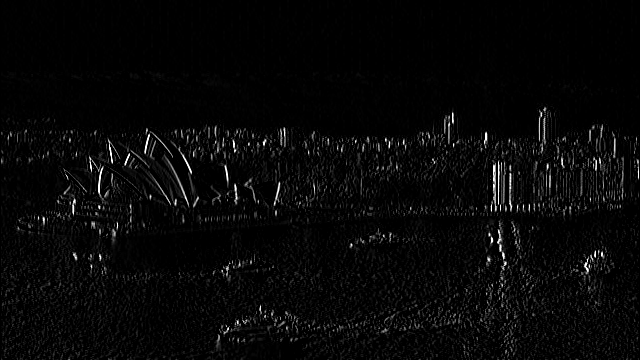

In [ ]:
cv2_imshow(filteredK2)

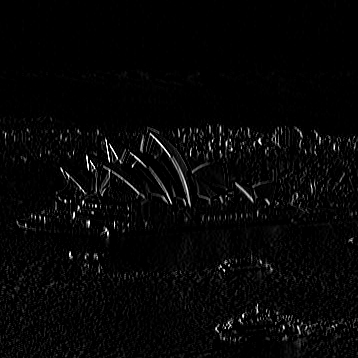

In [ ]:
cv2_imshow(convolve2D(gray,kernel2))

##3. Please answer below questions related to Harris corner detection as follow:

## a. Explain the basic idea to detect the Corner Points in an image

Corner dibentuk oleh kombinasi atau persilangan dua atau lebih vertex. Corner ini mungkin atau mungkin tidak menentukan batas gambar. Corner Point adalah titik pertemuan dari 2 atau lebih vertex tersebut. Jadi algoritma corner detection adalah algoritma yang membantu dalam mengidentifikasi corner pada gambar.

##b. If M is second moment matrix of image derivatives, please explain mathematically how to classify image points based on M Matrix!

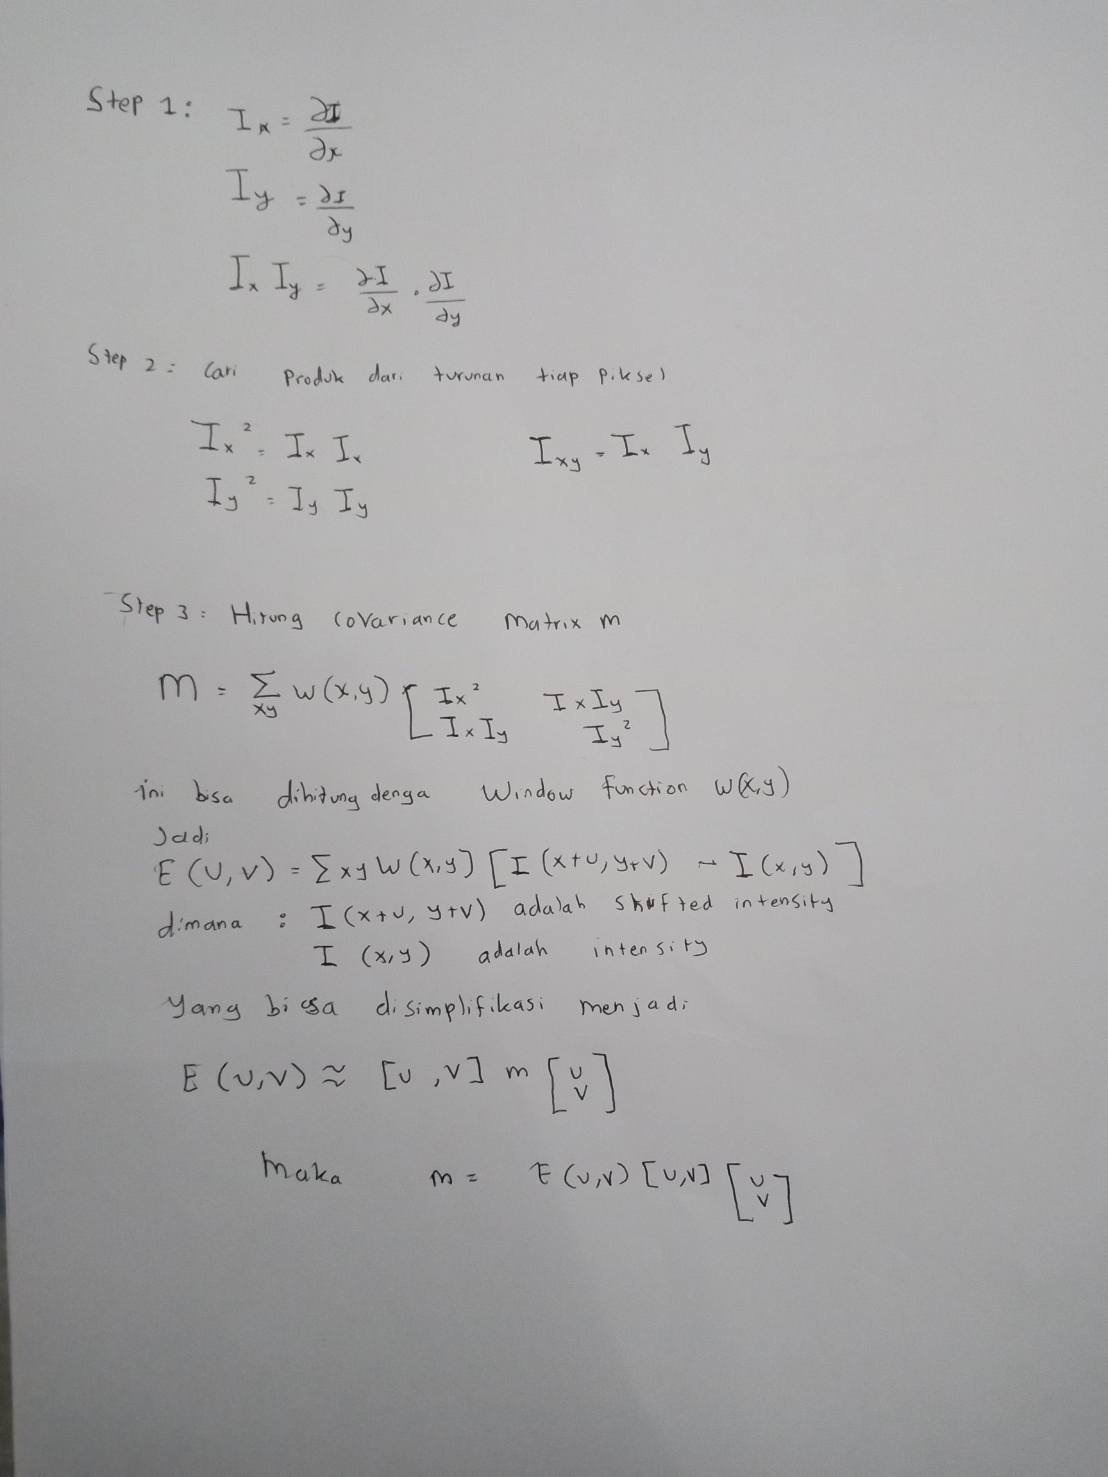

## c. Harris corner detector algorithm is based on above idea, together with additional step to enhance the detector. Please explain each step of Harris corner detector based on its original paper: C.Harris and M.Stephens. "A Combined Corner and Edge Detector“, Proceedings of the 4th Alvey Vision Conference: pages 147—151, 1988


1. Convert gambar asli ke grayscale

2. Terapkan filter Gaussian untuk menghaluskan noise apa pun

3. Terapkan operator Sobel untuk menemukan nilai gradien x dan y untuk setiap piksel pada gambar grayscale

4. Untuk setiap piksel p dalam gambar grayscale, gunakan semacam jendela  berukuran 3 × 3 di sekitarnya dan hitung fungsi kekuatan sudut. Sebut ini sebagai nilai Harris.

5. Temukan semua piksel yang melebihi ambang tertentu dan merupakan maksimum lokal dalam jendela tertentu (untuk mencegah duplikasi fitur yang berlebihan)

6. Untuk setiap piksel yang memenuhi kriteria di 5, hitung deskriptor fitur.

##d. Please download the image from this URL: https://qrgo.page.link/jNBDK The first step is you load the image (checkerboard_101.png) and implement Harris corner detector. It can be done by using OpenCV library 

Preperation

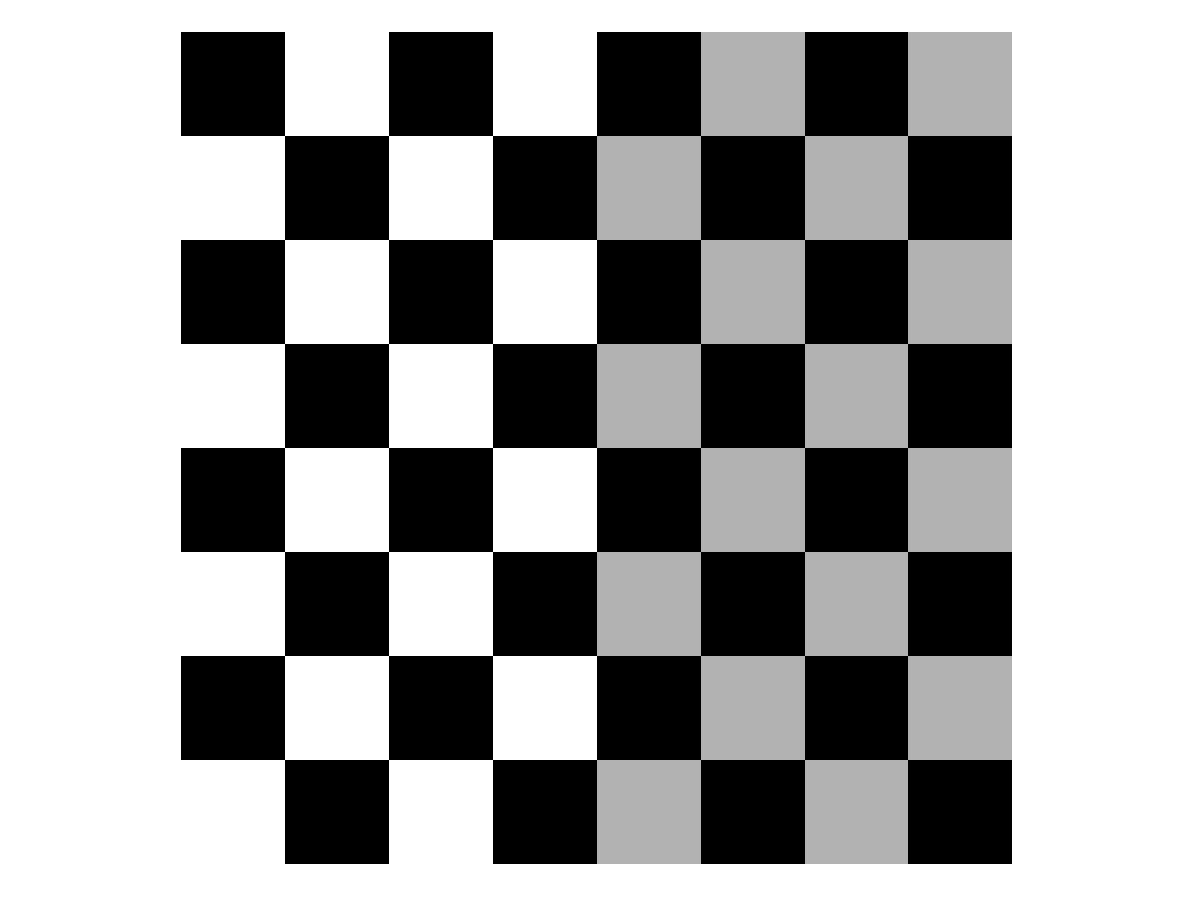

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

image = io.imread("https://qrgo.page.link/jNBDK") 
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image)

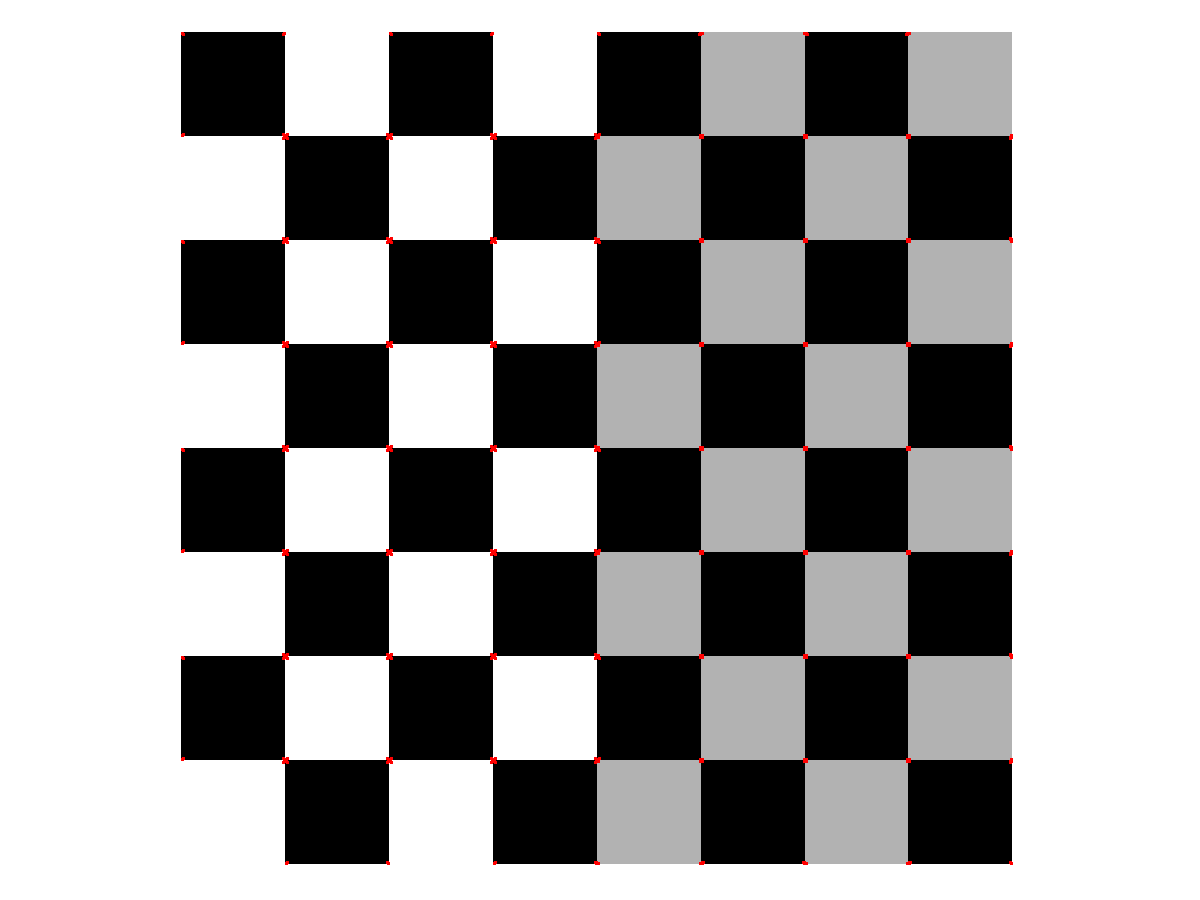

In [5]:
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY) 
gray = np.float32(gray) 
res = cv.cornerHarris(gray, 2, 5, 0.07) 
res= cv.dilate(res, None) 
image[res > 0.01 * res.max()]=[0, 0, 255]
cv2_imshow(image)

## 4. Canny edge detector was developed by John F. Canny in 1986 and uses a multi-stage algorithm to detect multiple edges in an image. Briefly describe the procedures involved in each stage, implement and apply it to this image from this URL: https://qrgo.page.link/HVHsH



Step dari algoritma ini adalah :
Noise reduction using Gaussian filter

> 1. Noise reduction using Gaussian filter
>>mengurangi atau menghilangkan noise dengan gussian filter, filter kernel yang digunakan adalah 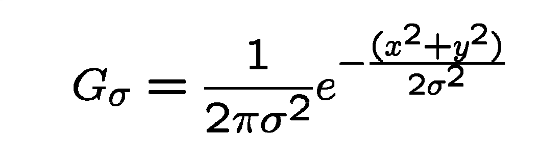

> 2. Gradient calculation along the horizontal and vertical axis
>> Saat gambar dihaluskan, turunan Ix dan Iy dihitung dengan sumbu x dan y. Ini dapat diimplementasikan dengan menggunakan konvolusi kernel Sobel-Feldman dengan gambar dengan rumus:

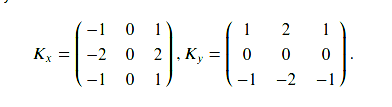

>> setelah menerapkan kernel ini kita dapat menggunakan besaran gradien dan sudut untuk memproses lebih lanjut langkah ini. Besarnya dan sudut dapat dihitung sebagai

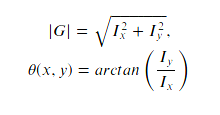


> 3. Non-Maximum suppression of false edges
>> Pada step ini kita akan mengurangi piksel hasil penggabungan yang duplikat di sepanjang tepi agar mereka menjadi tidak rata. Untuk setiap piksel temukan dua tetangga dalam arah gradien positif dan negatif, anggaplah setiap tetangga menempati sudut pi / 4, dan 0 adalah arah lurus ke kanan. Jika magnitudo piksel saat ini lebih besar dari magnitudo tetangganya, tidak ada yang berubah, jika tidak, besaran piksel saat ini disetel ke 0.

> 4. Double thresholding for segregating strong and weak edges
>> Pada step ini kita akan membandingkan besaran gradien dengan dua nilai ambang yang ditentukan, yang pertama lebih rendah dari yang kedua. Gradien yang lebih kecil dari nilai ambang batas rendah akan di supressed, gradien yang lebih tinggi dari nilai ambang batas tinggi ditandai sebagai yang kuat dan piksel yang sesuai dimasukkan dalam final edge map. Semua gradien lainnya ditandai sebagai yang lemah dan piksel yang sesuai dengan gradien ini akan dipertimbangkan di langkah berikutnya.

> 5. Edge tracking by hysteresis
>> Karena edge yang ditantahi lemah  di step sebelumnya terjadi karena edge yang sebenarnya akan dihubungkan ke piksel tepi yang kuat, piksel W dengan gradien yang lemah ditandai sebagai tepi dan dimasukkan dalam peta tepi akhir jika dan hanya jika itu terlibat dalam komponen terhubung yang sama dengan beberapa piksel S dengan gradien yang kuat. Dengan kata lain, harus ada rantai piksel lemah tetangga yang menghubungkan W dan S (tetangga ada 8 piksel di sekitar yang dipertimbangkan).

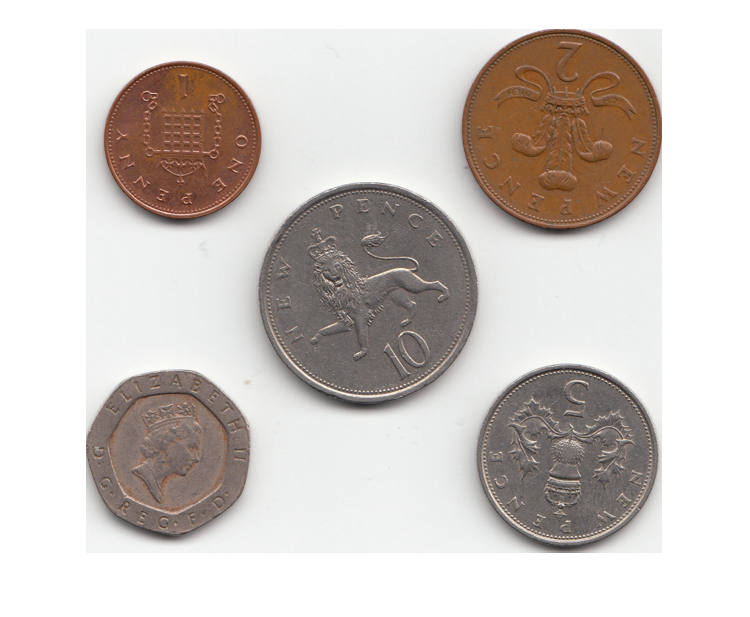

In [6]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

image = io.imread("https://qrgo.page.link/HVHsH") 
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image)

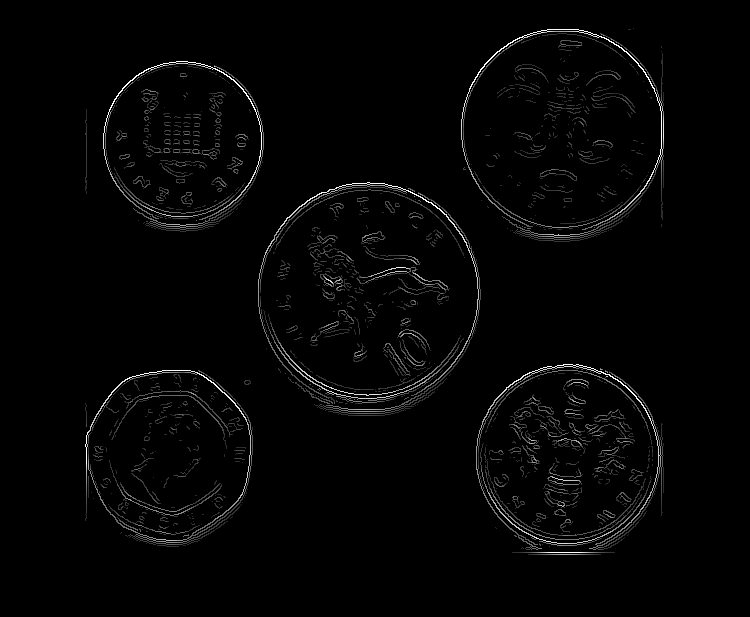

In [9]:
# defining the canny detector function 
   
# here weak_th and strong_th are thresholds for 
# double thresholding step 
def Canny_detector(img, weak_th = None, strong_th = None): 
      
    # conversion of image to grayscale 
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY) 
       
    # Noise reduction step 
    img = cv.GaussianBlur(img, (5, 5), 1.4) 
       
    # Calculating the gradients 
    gx = cv.Sobel(np.float32(img), cv.CV_64F, 1, 0, 3) 
    gy = cv.Sobel(np.float32(img), cv.CV_64F, 0, 1, 3) 
      
    # Conversion of Cartesian coordinates to polar  
    mag, ang = cv.cartToPolar(gx, gy, angleInDegrees = True) 
       
    # setting the minimum and maximum thresholds  
    # for double thresholding 
    mag_max = np.max(mag) 
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    # getting the dimensions of the input image   
    height, width = img.shape 
       
    # Looping through every pixel of the grayscale  
    # image 
    for i_x in range(width): 
        for i_y in range(height): 
               
            grad_ang = ang[i_y, i_x] 
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
               
            # selecting the neighbours of the target pixel 
            # according to the gradient direction 
            # In the x axis direction 
            if grad_ang<= 22.5: 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
              
            # top right (diagnol-1) direction 
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction 
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagnol-2) direction 
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle 
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
               
            # Non-maximum suppression step 
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img) 
    strong_ids = np.zeros_like(img)               
    ids = np.zeros_like(img) 
       
    # double thresholding step 
    for i_x in range(width): 
        for i_y in range(height): 
              
            grad_mag = mag[i_y, i_x] 
              
            if grad_mag<weak_th: 
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th: 
                ids[i_y, i_x]= 1
            else: 
                ids[i_y, i_x]= 2
       
       
    # finally returning the magnitude of 
    # gradients of edges 
    return mag 
   
canny_img = Canny_detector(image) 
cv2_imshow(canny_img)
   


## a. Noise Reduction. For this purpose, what kind of filter is used? And why is this stage very important to do in the first place? Explain it!


filter yang digunakan adalah gaussian filter seperti yang dituliskan diatas. Step ini penting untuk menghasilkan hasil yang optimal tanpa adanya step ini, noise dapat dianggap sebagai edge karena perubahan intensitas mendadak oleh edge detector

##  b. Finding Intensity Gradient of the Image. What does this stage produce? And what filters do you use to achieve it?

Seperti yang dibahas diatas, filter yang digunakan adalah konvolusi kernel Sobel-Feldman. hasil step ini adalah terdeteksi nya edge intensity dan direction


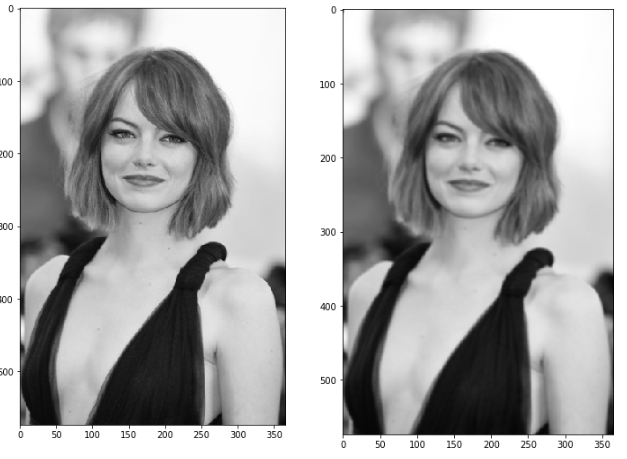

atau pada soal

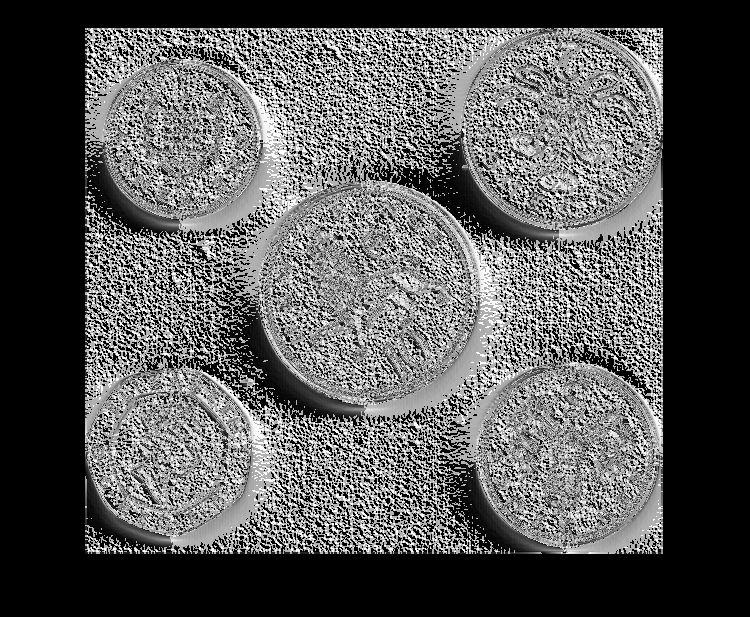

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float16),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float16))

In [12]:
from scipy import ndimage
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    cv2_imshow(G)
    return (G, theta)
sobel_filters(cv.cvtColor(image, cv.COLOR_RGB2GRAY) )


## c.Non-maximum Suppression. What is meant by this stage?


stage yang bertujuan menghasilkan gambar yang sama dengan tepi yang lebih tipis. 

## d. Hysteresis Thresholding. What is the purpose of this stage? How do you perform double thresholding to achieve this goal?


Berdasarkan step sebelumnya, step ini akan mengubah piksel lemah menjadi piksel kuat, jika dan hanya jika setidaknya satu piksel di sekitar piksel yang sedang diproses adalah piksel kuat. Step ini bertujuan untuk menghasilkan  hasil yang optimal dengan mengurangi noise